In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import contingency_matrix
from sklearn.neighbors import KernelDensity
import os
import decimal
from math import log
import copy
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)
X_train, y_train = digits.data , digits.target
X_train

Image Data Shape (1797, 64)
Label Data Shape (1797,)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=26,whiten=False)
pca2 = PCA(n_components=36,whiten=False)
pca3 = PCA(n_components=41,whiten=False)

In [27]:
X_transformed1 = pca1.fit_transform(X_train)
X_transformed2 = pca2.fit_transform(X_train)
X_transformed3 = pca3.fit_transform(X_train)

In [43]:
def plot_digits(data):
    fig, ax = plt.subplots(8, 6, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

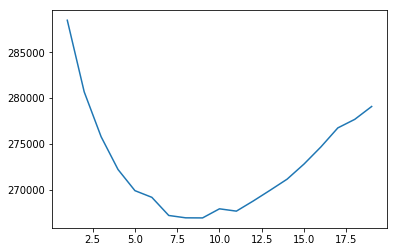

In [55]:
#number of components for PCA with 26 features
n_components = np.arange(1,20)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(X_transformed1).bic(X_transformed1) for model in models]
plt.plot(n_components, aics);

In [56]:
gmm1 = GMM(9, covariance_type='full', random_state=0)
gmm1.fit(X_transformed1)
print(gmm1.converged_)
import sklearn
print(sklearn.__version__)

True
0.20.3


In [57]:
data_new = gmm1.sample(48)
len(data_new[0][0])

26

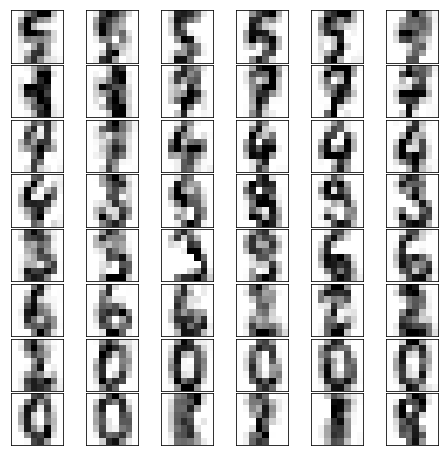

In [58]:
digits_new = pca1.inverse_transform(data_new[0])
plot_digits(digits_new)

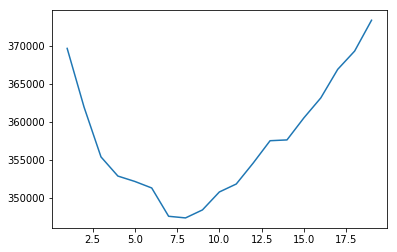

In [60]:
#number of components for PCA with 36 features
n_components = np.arange(1,20)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(X_transformed2).bic(X_transformed2) for model in models]
plt.plot(n_components, aics);

In [61]:
gmm2 = GMM(8, covariance_type='full', random_state=0)
gmm2.fit(X_transformed2)
print(gmm2.converged_)

True


In [62]:
data_new = gmm2.sample(48)
len(data_new[0][0])

36

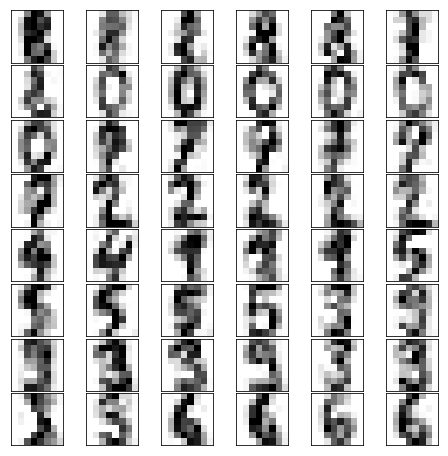

In [63]:
digits_new = pca2.inverse_transform(data_new[0])
plot_digits(digits_new)

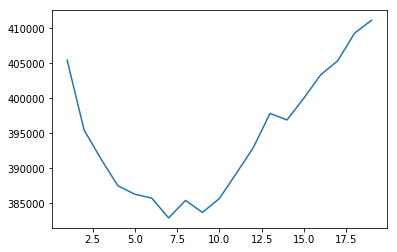

In [65]:
#number of components for PCA with 41 features
n_components = np.arange(1,20)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(X_transformed3).bic(X_transformed3) for model in models]
plt.plot(n_components, aics);

In [67]:
gmm3 = GMM(7, covariance_type='full', random_state=0)
gmm3.fit(X_transformed3)
print(gmm3.converged_)

True


In [68]:
data_new = gmm3.sample(48)
len(data_new[0][0])

41

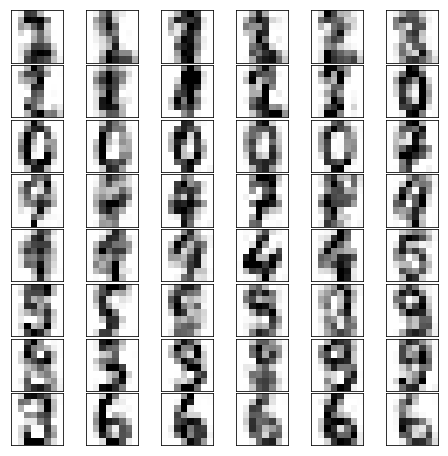

In [69]:
digits_new = pca3.inverse_transform(data_new[0])
plot_digits(digits_new)